<a href="https://colab.research.google.com/github/plaban1981/BERT-NLP/blob/master/BERT_Zindi_Mental_Health_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 129kB/s 
     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 6.7MB 24.0MB/s 
     |████████████████████████████████| 983kB 60.2MB/s 
     |████████████████████████████████| 245kB 63.5MB/s 
     |████████████████████████████████| 675kB 51.8MB/s 
     |████████████████████████████████| 471kB 55.7MB/s 
     |████████████████████████████████| 3.9MB 51.4MB/s 
     |████████████████████████████████| 450kB 51.2MB/s 
     |████████████████████████████████| 3.8MB 48.6MB/s 
     |████████████████████████████████| 890kB 56.2MB/s 
     |████████████████████████████████| 1.1MB 61.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.16.3-cp36-none-any.whl size=25246180 sha256=52a2b89cbd236ca72bd9c27df01698046669ac590aa2d2da4dfe7ec505bdde32
  Stored in directory: /root/.cache/pip/wheels/2b/24/21/a52cc4dcb0b438cf570e9d44c017761d41335d9af4c189ebad
  Created wheel for keras-bert: filename=keras_bert-0.84.0-cp36-no

In [2]:
import numpy as np
import pandas as pd
import ktrain
import tensorflow as tf
from ktrain import text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Importing the dataset
We'll use pandas to read the dataset and load it into a dataframe.

In [4]:
df_train = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Train.csv')

In [5]:
df_test = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Test.csv')

In [6]:
df_train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [9]:
df_train.shape,df_test.shape

((616, 3), (309, 2))

In [10]:
from collections import Counter
words = []
for i in df_train['text'].values:
  for word in i.split():
    words.append(word)
word_dict = Counter(words)
print(len(word_dict))

1030


In [11]:
num_words = len(word_dict)

We can ask pandas how many sentences are labeled as "positive" (value 1) and how many are labeled "negative" (having the value 0)

In [13]:
df_train.label.value_counts(normalize=True)

Depression    0.571429
Alcohol       0.227273
Suicide       0.107143
Drugs         0.094156
Name: label, dtype: float64

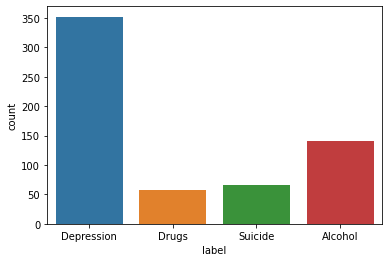

In [14]:
import seaborn as sns
sns.countplot(df_train['label'])

### texts_from_df: texts and associated labels are stored in columns in a pandas DataFrame

In [19]:
labels = df_train.label.unique().tolist()

In [30]:
labels

['Depression', 'Drugs', 'Suicide', 'Alcohol']

In [24]:
df_train.columns

Index(['ID', 'text', 'label'], dtype='object')

In [81]:
df_train= df_train[['text', 'label']]
labels_enc = pd.get_dummies(df_train['label'])
train = pd.concat([df_train,labels_enc],axis=1)
train.head()

,text,label,Alcohol,Depression,Drugs,Suicide
0,I feel that it was better I dieAm happy,Depression,0,1,0,0
1,Why do I get hallucinations?,Drugs,0,0,1,0
2,I am stresseed due to lack of financial suppor...,Depression,0,1,0,0
3,Why is life important?,Suicide,0,0,0,1
4,How could I be helped to go through the depres...,Depression,0,1,0,0


In [28]:
train = train[['text','Alcohol','Depression','Drugs','Suicide']]
train.head()

,text,Alcohol,Depression,Drugs,Suicide
0,I feel that it was better I dieAm happy,0,1,0,0
1,Why do I get hallucinations?,0,0,1,0
2,I am stresseed due to lack of financial suppor...,0,1,0,0
3,Why is life important?,0,0,0,1
4,How could I be helped to go through the depres...,0,1,0,0


In [87]:

DATA_PATH = '/content/drive/My Drive/Zindi/Tech4MentalHealth/Train.csv'
NUM_WORDS = 50000
MAXLEN = 150
trn, val, preproc = text.texts_from_csv(DATA_PATH,
                     'text',
                      label_columns = ["label"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

detected encoding: utf-8 (if wrong, set manually)
language: en
Word Counts: 792
Nrows: 554
554 train sequences
train sequence lengths:
	mean : 8
	95percentile : 15
	99percentile : 20
x_train shape: (554,150)
y_train shape: (554, 4)
Is Multi-Label? False
62 test sequences
test sequence lengths:
	mean : 7
	95percentile : 15
	99percentile : 22
x_test shape: (62,150)
y_test shape: (62, 4)


In [7]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(df_train, 
                                                                   'text', # name of column containing review text
                                                                   label_columns=['label'],
                                                                   maxlen=200, 
                                                                   preprocess_mode='bert')                                        

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


# STEP 2: Create a Model and Wrap in Learner Object

In [8]:
model = text.text_classifier('bert', (X_train, y_train) , preproc=preproc,multilabel=True)
learner = ktrain.get_learner(model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

Is Multi-Label? True
maxlen is 200
done.


# STEP 3: Estimate the LR
We'll use the ktrain learning rate finder to find a good learning rate to use with nbsvm. We will, then, select the highest learning rate associated with a still falling loss.

simulating training for different learning rates... this may take a few moments...
Train on 554 samples
Epoch 1/1024
554/554 [==============================] - 41s 74ms/sample - loss: 0.6017 - accuracy: 0.7477
Epoch 2/1024
554/554 [==============================] - 25s 44ms/sample - loss: 0.5718 - accuracy: 0.7685
Epoch 3/1024
554/554 [==============================] - 24s 44ms/sample - loss: 0.5271 - accuracy: 0.7775
Epoch 4/1024
554/554 [==============================] - 25s 44ms/sample - loss: 0.4445 - accuracy: 0.8118
Epoch 5/1024
554/554 [==============================] - 25s 45ms/sample - loss: 0.3403 - accuracy: 0.8673
Epoch 6/1024
554/554 [==============================] - 25s 46ms/sample - loss: 0.2138 - accuracy: 0.9228
Epoch 7/1024
554/554 [==============================] - 25s 46ms/sample - loss: 0.1448 - accuracy: 0.9499
Epoch 8/1024
554/554 [==============================] - 25s 46ms/sample - loss: 0.1470 - accuracy: 0.9458
Epoch 9/1024
554/554 [==========================

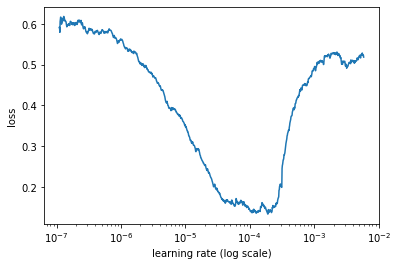

In [9]:
learner.lr_find(show_plot=True)

In [10]:
learner.autofit(1e-4, 8)



begin training using triangular learning rate policy with max lr of 0.0001...
Train on 554 samples, validate on 62 samples
Epoch 1/8
554/554 [==============================] - 29s 53ms/sample - loss: 0.3463 - accuracy: 0.8588 - val_loss: 0.1292 - val_accuracy: 0.9516
Epoch 2/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.1478 - accuracy: 0.9486 - val_loss: 0.1012 - val_accuracy: 0.9637
Epoch 3/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0919 - accuracy: 0.9689 - val_loss: 0.1115 - val_accuracy: 0.9677
Epoch 4/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0557 - accuracy: 0.9783 - val_loss: 0.0847 - val_accuracy: 0.9556
Epoch 5/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0373 - accuracy: 0.9860 - val_loss: 0.1315 - val_accuracy: 0.9556
Epoch 6/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.1251 - val_accuracy: 0.9516
Epoch

In [13]:
learner.fit_onecycle(1e-4, 8)



begin training using onecycle policy with max lr of 0.0001...
Train on 554 samples, validate on 62 samples
Epoch 1/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0435 - accuracy: 0.9878 - val_loss: 0.3284 - val_accuracy: 0.9355
Epoch 2/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.3858 - val_accuracy: 0.9355
Epoch 3/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0757 - accuracy: 0.9829 - val_loss: 0.1862 - val_accuracy: 0.9597
Epoch 4/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0513 - accuracy: 0.9883 - val_loss: 0.1337 - val_accuracy: 0.9758
Epoch 5/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0690 - accuracy: 0.9770 - val_loss: 0.2568 - val_accuracy: 0.9355
Epoch 6/8
554/554 [==============================] - 26s 47ms/sample - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.3239 - val_accuracy: 0.9355
Epoch 7/8
554/554 [==

In [17]:
p = ktrain.get_predictor(learner.model, preproc)
predictions = []
for text in df_test['text'].values:
  predictions.append(p.predict(text,return_proba=True).tolist())

In [31]:
p = ktrain.get_predictor(learner.model, preproc)
predictions = []
for text in df_test['text'].values:
  predictions.append(np.round(p.predict(text,return_proba=True)).tolist())

In [19]:
df_test['text'].loc[7]

'I feel unloved and uncared for'

In [32]:
np.round(p.predict(df_test['text'].loc[7],return_proba=True),2).tolist()

[0.0, 1.0, 0.0, 0.0]

In [21]:
len(predictions)

309

In [22]:
pred_df = pd.DataFrame(predictions,columns=['Alcohol','Depression','Drugs','Suicide'])

In [23]:
pred_df.head()

,Alcohol,Depression,Drugs,Suicide
0,0.005696,0.369127,0.011960,0.663249
1,0.000037,0.999831,0.000021,0.000097
2,0.000034,0.999869,0.000022,0.000102
3,0.000063,0.999912,0.000029,0.000084
4,0.000997,0.003320,0.998113,0.000464


In [33]:
pred_df = pd.DataFrame(predictions,columns=['Alcohol','Depression','Drugs','Suicide'])
pred_df.head()

,Alcohol,Depression,Drugs,Suicide
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [35]:
df_sub = pd.concat([df_test,pred_df],axis=1)

Our dataset is now in the `padded` variable, we can view its dimensions below:

In [25]:
df_sub.head()

,ID,text,Alcohol,Depression,Drugs,Suicide
0,02V56KMO,How to overcome bad feelings and emotions,0.005696,0.369127,0.011960,0.663249
1,03BMGTOK,I feel like giving up in life,0.000037,0.999831,0.000021,0.000097
2,03LZVFM6,I was so depressed feel like got no strength t...,0.000034,0.999869,0.000022,0.000102
3,0EPULUM5,I feel so low especially since I had no one to...,0.000063,0.999912,0.000029,0.000084
4,0GM4C5GD,can i be successful when I am a drug addict?,0.000997,0.003320,0.998113,0.000464


In [26]:
df_sub.tail(20)

,ID,text,Alcohol,Depression,Drugs,Suicide
289,XUHRT8P4,I don't see the need to live in the world,0.000087,0.999890,0.000058,0.000122
290,XXMTEUX8,How do I go about solving my problem?,0.794473,0.083082,0.010236,0.054209
291,XYRTMPGC,I feel depressed because of lack of school fee...,0.000038,0.999914,0.000022,0.000107
292,Y3QTMIO7,Dumped with my boyfriend?,0.000033,0.999890,0.000024,0.000122
293,Y5S49JQ7,Asked for financial support from wellwishers,0.000075,0.999867,0.000084,0.000209
294,YAK9NY3K,how can I limit my drinking,0.993245,0.002957,0.000493,0.000183
295,YCHHQT18,"If a person rejects you, what would you do?",0.000070,0.999913,0.000027,0.000094
296,YDIWQZA5,Is suicide the right decision?,0.000460,0.008420,0.000795,0.993042
297,YG9CPVR0,What can i do to pass at school? what can i do...,0.000138,0.999770,0.000181,0.000360
298,YIJ0CEQJ,What are the effects of abusing bhang?,0.001178,0.002730,0.998065,0.000416


In [36]:
df_sub.tail(20)

,ID,text,Alcohol,Depression,Drugs,Suicide
289,XUHRT8P4,I don't see the need to live in the world,0.0,1.0,0.0,0.0
290,XXMTEUX8,How do I go about solving my problem?,1.0,0.0,0.0,0.0
291,XYRTMPGC,I feel depressed because of lack of school fee...,0.0,1.0,0.0,0.0
292,Y3QTMIO7,Dumped with my boyfriend?,0.0,1.0,0.0,0.0
293,Y5S49JQ7,Asked for financial support from wellwishers,0.0,1.0,0.0,0.0
294,YAK9NY3K,how can I limit my drinking,1.0,0.0,0.0,0.0
295,YCHHQT18,"If a person rejects you, what would you do?",0.0,1.0,0.0,0.0
296,YDIWQZA5,Is suicide the right decision?,0.0,0.0,0.0,1.0
297,YG9CPVR0,What can i do to pass at school? what can i do...,0.0,1.0,0.0,0.0
298,YIJ0CEQJ,What are the effects of abusing bhang?,0.0,0.0,1.0,0.0


In [27]:
df_sub.isnull().sum()[df_sub.isnull().sum() > 0]

Series([], dtype: int64)

In [28]:
df_sub.drop('text',axis=1).to_csv('ktrain_bert_multilabel.csv',index=False)

Zindi score 0.5195116225022